# Glauber MC calculation

In [17]:
# clear all variables
%reset -f

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

## A small helper class to get random numbers from a user-defined pdistribution:

In [4]:
class pdf:
    def __init__(self, f, xmin, xmax):
        '''initialize grid of function values once'''
        self.f = f
        self.xmin = xmin
        self.xmax = xmax
        self.xgrid = np.linspace(xmin, xmax, 100000)
        self.ygrid = f(self.xgrid)
        
    def eval(self, x):
        '''return function value at position x'''
        return self.f(x)
    
    def get_random(self, n):
        '''get n random numbers drawn from the '''
        cdf = np.cumsum(self.ygrid)
        cdf = cdf / cdf[-1]
        values = np.random.rand(n)
        value_bins = np.searchsorted(cdf, values)
        random_from_cdf = self.xgrid[value_bins]
        return random_from_cdf

##  Define nuclear density distributions

In [5]:
def dndr_lead(r):
    '''nucleon density distribution of Pb (arbitrary normalization)'''
    R = 6.68 # fm
    a = 0.54 # fm
    return r**2/(1 + np.exp((r-R)/a))

In [6]:
def dndr_oxygen(r):
   # add code here: function oxygen here
   ...

## Define impact parameter distribution

In [7]:
def dndb(b):
    '''impact parameters distribution (black disk limit)'''
    return 2. * np.pi * b

## Parameters: #events, nuclear mass numbers, nucleon-nucleon cross section

In [8]:
n_events = 10000
A1 = 16 # oxygen
A2 = 16 # oxygen
sigma_nn_inel_fm2 = 64. / 10;  # 1 mb = 0.1 fm^2 

In [9]:
bmax = 10. # fm
r_distr = pdf(dndr_oxygen, 0., 5.) # probability distribution of the nucleon radius within nucleus
b_distr = pdf(dndb, 0., bmax)  # probability distribution of the impact parameter

In [10]:
impact_pars = b_distr.get_random(n_events) # array of impact parameters
npart_values = np.zeros(n_events)  # array of Npart values (initialized with zeros)
ncoll_values = np.zeros(n_events)  # array of Ncoll values (initialized with zeros)

## The main event loop

In [11]:
for i_event in range(n_events):
    
    if i_event % 100 == 0: print("#", end='')
    
    # set impact parameters
    b = impact_pars[i_event]
    
    ncoll = 0
    npart = 0
    
    # array to store number of collisions for each nucleon (both nuclei)
    nc1 = np.zeros(A1)
    nc2 = np.zeros(A2)
    
    # distribute nucleon of nucleus 1
    R_1 = r_distr.get_random(A1)
    phi_1 = np.random.uniform(0., 2*np.pi, A1)
    theta_1 = np.arccos(np.random.uniform(-1., 1., A1))
    x_1 = R_1 * np.sin(theta_1) * np.cos(phi_1) + b/2.
    y_1 = R_1 * np.sin(theta_1) * np.sin(phi_1)
    z_1 = R_1 * np.cos(theta_1)
    
    # distribute nucleon of nucleus 2
    R_2 = r_distr.get_random(A2)
    phi_2 = np.random.uniform(0., 2*np.pi, A2)
    theta_2 = np.arccos(np.random.uniform(-1., 1., A2))
    x_2 = R_1 * np.sin(theta_2) * np.cos(phi_2) - b/2.
    y_2 = R_2 * np.sin(theta_2) * np.sin(phi_2)
    z_2 = R_2 * np.cos(theta_2)
    
    # list with nucleon indecees
    in1 = range(A1)
    in2 = range(A2)
    
    # consider all nucleon pairs
    for pair in itertools.product(in1, in2):
        nucleon1 = pair[0] # nucleon index in nucleus 1
        nucleon2 = pair[1] # nucleon index in nucleus 2
        dx = x_1[nucleon1] - x_2[nucleon2]
        dy = y_1[nucleon1] - y_2[nucleon2]
        
        # distance squared of the two nucleons in the transverse plane
        d_squared = dx**2 + dy**2 
        
        if d_squared < ...: # add code here
            ncoll += 1
            if (nc1[nucleon1] == 0): npart += 1
            if (nc2[nucleon2] == 0): npart += 1
            
            # add code here: increase collision counter for the two nucleons
            ...
            
      
    # print(ncoll)
    
    npart_values[i_event] = npart
    ncoll_values[i_event] = ncoll
        

####################################################################################################

## Create pandas data frame from Glauber MC results

In [12]:
gmc = pd.DataFrame({'b':impact_pars, 'Npart':npart_values, 'Ncoll':ncoll_values}, columns=['b', 'Npart', 'Ncoll'])
gmc_inel = gmc[gmc.Ncoll != 0]
impact_pars_inel = gmc_inel.b.values

## Plot impact parameter distribution

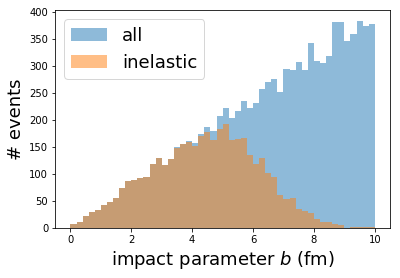

In [13]:
plt.hist(impact_pars, bins=50, range=(0., 10.), alpha=0.5, label='all')
plt.hist(impact_pars_inel, bins=50, range=(0., 10.), alpha=0.5, label='inelastic')
plt.xlabel('impact parameter $b$ (fm)', size=18)
plt.ylabel('# events', size=18)
plt.legend(fontsize=18)
plt.show()

## Mean $N_{part}$ and $N_{coll}$ for the 10% most central inelastic collisions

In [14]:
bmax_0_10 = np.quantile(impact_pars_inel, 0.1)
gmc_inel_0_10 = gmc[(gmc.Ncoll != 0) & (gmc.b < bmax_0_10)]

In [15]:
mean_part_0_10 = gmc_inel_0_10.Npart.mean()
mean_coll_0_10 = gmc_inel_0_10.Ncoll.mean()
print("0-10%:", '<Npart> = {:4.2f}'.format(mean_part_0_10), ', <Ncoll> = {:4.2f}'.format(mean_coll_0_10))

0-10%: <Npart> = 25.46 , <Ncoll> = 38.76


## Mean $N_{part}$ and $N_{coll}$ for the 5% most central inelastic collisions

In [ ]:
# ...

## Total inelastc cross section

In [21]:
# ...